In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold , cross_val_score , train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
zoo = pd.read_csv("Zoo.csv")

zoo.rename(columns = {"animal name":"animalname"},inplace =True)

In [3]:
zoo.head()

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo['type'].value_counts() #  getting different types of animals

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [5]:
# splitting  zoo dataset into x and y 

x = zoo.iloc[:,1:-1]
y = zoo.iloc[:,-1]

In [6]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [7]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [8]:
#using train test split on x and y
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 42 )

### Fitting KNN model

#### Getting optimum k value score to fit in model.

##### Visualizing crossvalidation score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least

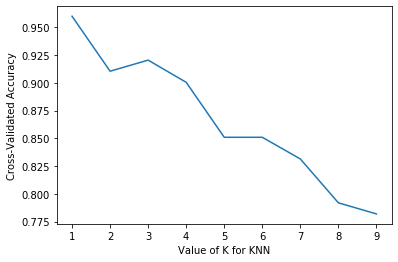

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 10
k_range = range(1,10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [24]:
k_values_sorted = pd.DataFrame({'k_scores': k_scores})
k_values_sorted.sort_values('k_scores',ascending = False)

,k_scores
0,0.960000
2,0.920476
1,0.910476
3,0.900476
4,0.850952
5,0.850952
6,0.831429
7,0.791905
8,0.781905


#### using 2 as n_neighbours to fit data

In [25]:
model = KNeighborsClassifier(n_neighbors=2)
knn = model.fit(x_train, y_train)
results = cross_val_score(model, x_train, y_train, cv=2)

In [26]:
results.mean()

0.866642958748222

### predicting x test data

In [27]:
y_pred =model.predict(x_test)

In [28]:
results  = pd.DataFrame({'actual':y_test,'Predicted':y_pred})

In [29]:
results

,actual,Predicted
84,1,1
55,1,1
66,1,1
67,1,1
45,1,1
39,6,6
22,1,1
44,1,1
10,1,1
0,1,1


using n neighbors as 2 we can see that most of the data were identified correctly.